# SIMPLEBVP.IPYNB -- Solve a boundary value problem numerically

In [1]:
### IMPORT STUFF ###

import numpy as np
from scipy.interpolate import interp1d
from scipy.integrate import odeint
import matplotlib.pyplot as plt

In [2]:
### DEFINE KEY FUNCTIONS ###

def uDE(y,r): # first of coupled 1st order ODEs
        
    u, a = y # y = [u,a] is array of dependent variables, r is independent variable -- unpack y here
        
    return  a # this is saying u' == a
    
def aDE(y,r): # second of coupled 1st order ODEs
    
    u, a = y
    
    return 9.*u # this is saying a' == 9u

def eqs(y,r): # define full system of coupled ODEs
     
    return uDE(y,r), aDE(y,r)

In [3]:
### PROVIDE INPUT PARAMETERS ###

pts = 1e2 # number of points at which to evaluate numerical integration
a0 = 1. # guess for initial condition on a(r)

In [4]:
### RUN CODE ###

y0 = [0.,a0] # specify boundary condition at first boundary

rlist = np.linspace(0.,1.,int(pts)) # list radial points between boundaries at which to evaluate numerical integration

ysol = odeint(eqs,y0,rlist) # do numerical integration

usoldat = ysol[:,0] # record solution for u(r)
asoldat = ysol[:,1] # record solution for a(r)

usol = interp1d(rlist,usoldat,kind='linear') # interpolate full solution for u(r) from tabulation
asol = interp1d(rlist,asoldat,kind='linear') # interpolate full solution for a(r) from tabulation

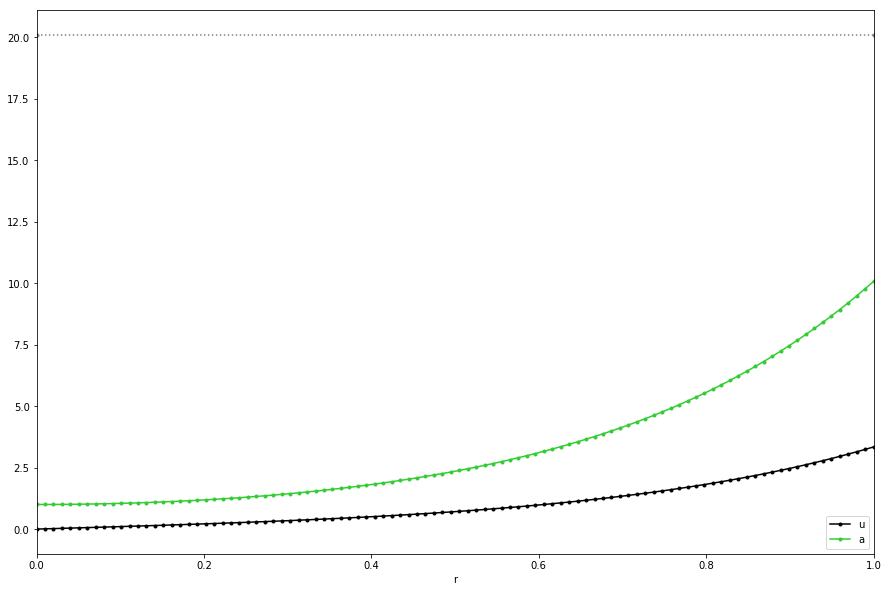

Here is the solution with a0 = 1.0.


In [5]:
### OUTPUT RESULTS ###

plt.figure(1,(15,10)) # plot u(r), a(r)
plt.plot(rlist,usol(rlist),c='black',marker='.',label='u')
plt.plot(rlist,asol(rlist),c='limegreen',marker='.',label='a')
plt.plot([0.,1.],[np.exp(3.),np.exp(3.)],c='gray',marker='.',ls='dotted')
plt.xlabel('r')
plt.xlim(0.,1.)
#plt.ylim(0.,100.)
plt.legend()
plt.show()

print 'Here is the solution with a0 = {0}.'.format(a0)